### Package Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert

# Data Cleaning

In [2]:
# Load the dataset
data = pd.read_csv('./data/Telco-Customer-Churn.csv', na_values=[' '])

In [3]:
# Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# print column types
for col in data.select_dtypes('object').columns:
    distinct_values = np.unique(data[col])
    if len(distinct_values) < 10:
        print(f"{col}: {distinct_values}")
    else:
        print(f"{col} has more than 10 distinct values.")

# print unique rows
print(f"Number of unique customerIDs: {len(data['customerID'].unique())}")

customerID has more than 10 distinct values.
gender: ['Female' 'Male']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'No phone service' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'No internet service' 'Yes']
OnlineBackup: ['No' 'No internet service' 'Yes']
DeviceProtection: ['No' 'No internet service' 'Yes']
TechSupport: ['No' 'No internet service' 'Yes']
StreamingTV: ['No' 'No internet service' 'Yes']
StreamingMovies: ['No' 'No internet service' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['No' 'Yes']
PaymentMethod: ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
Churn: ['No' 'Yes']
Number of unique customerIDs: 7043


There are 21 columns with 7043 unique observations. 
There are 11 NaN values in the TotalCharges column. 

The column types are not well-defined.
- Yes/ No columns can be turned to 1/0. 
- TotalCharges should be a float column

It is not possible to infer the TotalCharges column, so observations with NaN values should be dropped. This reduces the amount of datapoints negibly but makes the rest of the data easier to work with. 

In [6]:
# map yes/no columns to 1/0 values
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
yes_no_mapping = {'Yes': 1, 'No': 0}
data[yes_no_columns] = data[yes_no_columns].replace(yes_no_mapping)

# remove "(automatic)" from PaymentMethod column
payment_method_mapping = {'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'}
data[('PaymentMethod')] = data['PaymentMethod'].replace(payment_method_mapping)

# change TotalCharges dtype
data['TotalCharges'] = data['TotalCharges'].astype(float)

# Show NaN values in TotalCharges column
data[data['TotalCharges'].isnull()]

# Drop rows with NaN values in TotalCharges
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

/var/folders/pv/ng4pj3dx1lzdf21rlczf5b900000gn/T/ipykernel_77447/2313373423.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_columns] = data[yes_no_columns].replace(yes_no_mapping)


## Univariate Analysis
Examining variables individually

In [7]:
# describe df
data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [8]:
# column types
binary_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
numerical_columns = ['MonthlyCharges', 'TotalCharges']

### Visualize Binary Columns

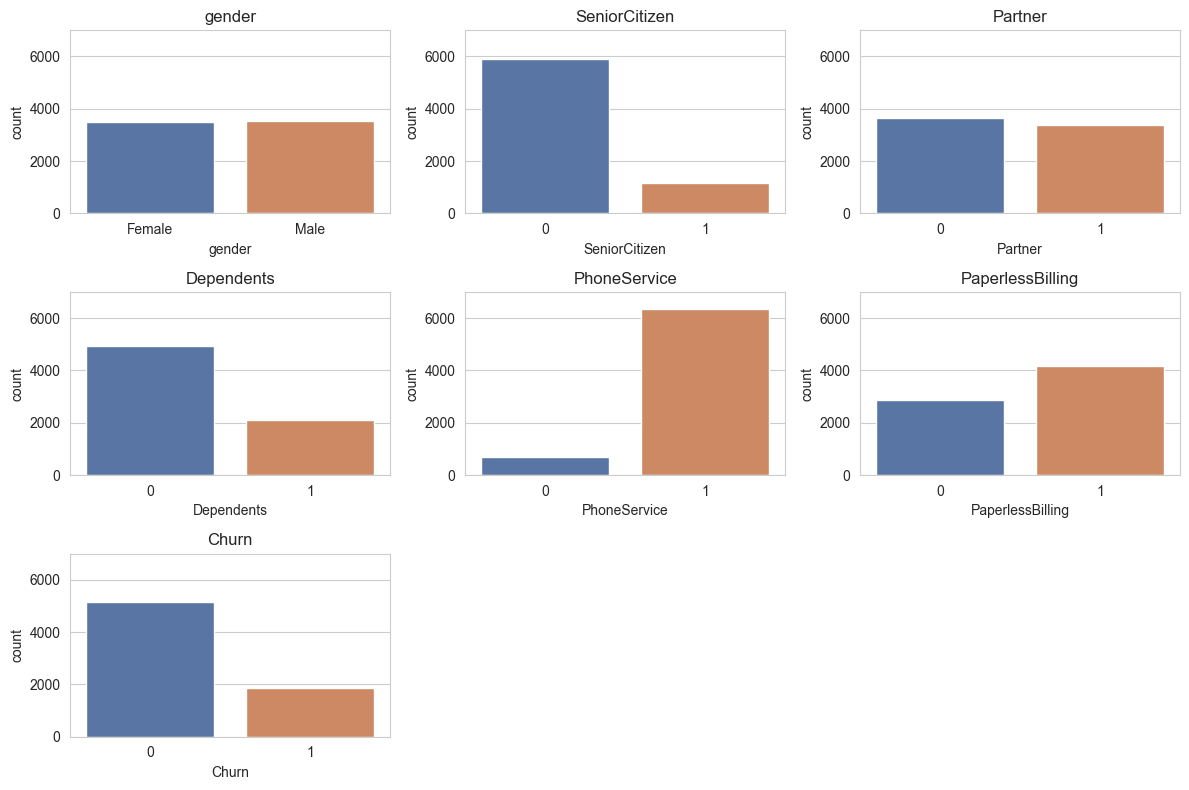

In [9]:
# Visualize Binary Columns
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Iterate through each binary column and create a bar plot
for i, column in enumerate(binary_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=column, hue=column, data=data, palette='deep', legend=False)
    plt.title(column)
    ax.set(ylim=(0, 7000))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Only gender and Partner columns are relatively balanced. 
Ca. 6/7 observations are not senior citizens
Ca. 5/7 observations do not have dependents
Ca. 6/7 observations have phone service
Ca. 4/7 observations have paperless billing
Ca. 5/7 observations do not churn

### Visualize Categorical Columns

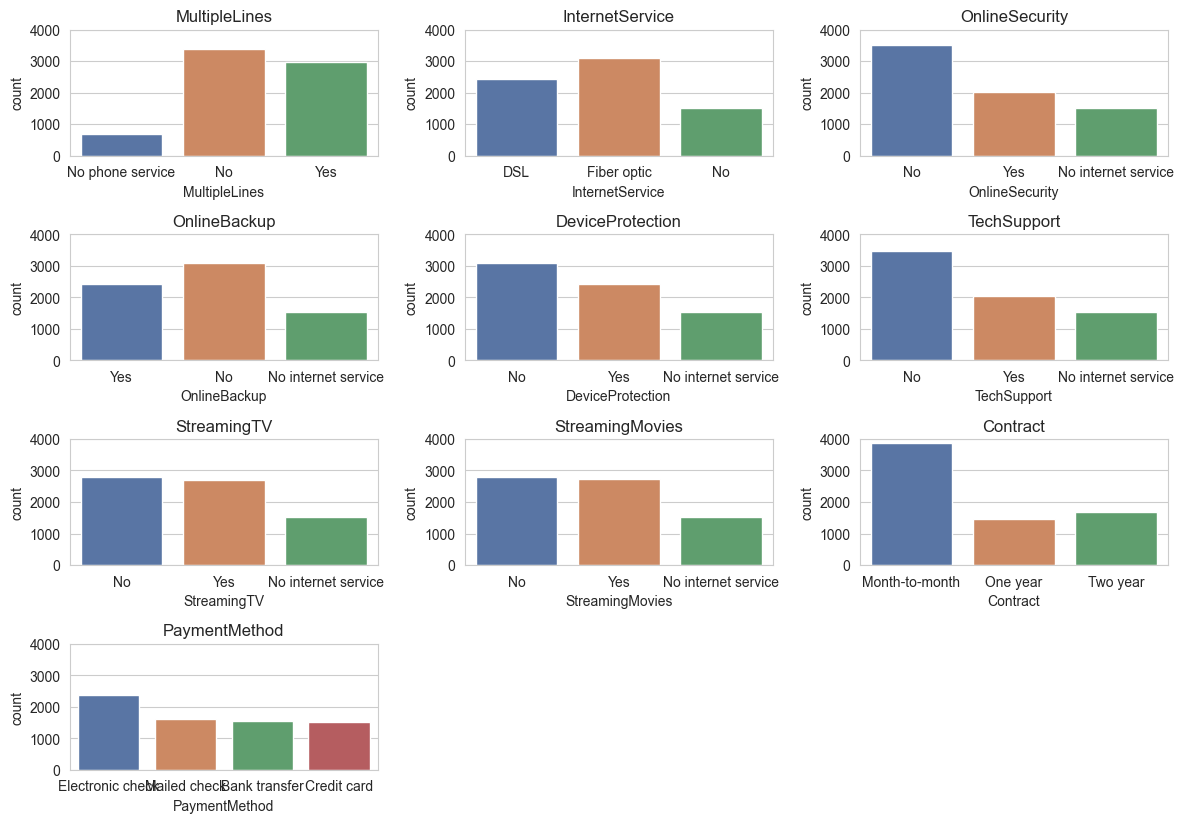

In [10]:
# Visualize Categorical Columns
# Set the size of the plot
plt.figure(figsize=(12, 12))

# Iterate through each categorical column and create a bar plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=column, hue=column, data=data, palette='deep', legend=False)
    plt.title(column)
    ax.set(ylim=(0, 4000))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Count occurences of PhoneService: 0 and MultipleLines: 'No phone service'
ps = len(data[data['PhoneService'] == 0]) == len(data[(data['PhoneService'] == 0) & (data['MultipleLines'] == 'No phone service')])
print(f"PhoneService: 0 matches MultipleLines 'No phone service' count: {ps}")

# Count occurences of "No internet service" in categorical columns to check overlap with No InternetService
print(f"No Internet service: {data['InternetService'].value_counts().get('No',0)}")

for column in categorical_columns:
    print(f"'No internet service' in column {column}: {data[column].value_counts().get('No internet service',0)}")
    
# Value counts for PaymentMethod
print(data['PaymentMethod'].value_counts())

PhoneService: 0 matches MultipleLines 'No phone service' count: True
No Internet service: 1520
'No internet service' in column MultipleLines: 0
'No internet service' in column InternetService: 0
'No internet service' in column OnlineSecurity: 1520
'No internet service' in column OnlineBackup: 1520
'No internet service' in column DeviceProtection: 1520
'No internet service' in column TechSupport: 1520
'No internet service' in column StreamingTV: 1520
'No internet service' in column StreamingMovies: 1520
'No internet service' in column Contract: 0
'No internet service' in column PaymentMethod: 0
PaymentMethod
Electronic check    2365
Mailed check        1604
Bank transfer       1542
Credit card         1521
Name: count, dtype: int64


About 3000 observations have multiple lines, about 3000 observations have a single line, about 750 have no phone service.
1520 people have no internet service, which influences columns OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies, which each have 1520 observations with the value "No internet service".
The "No internet service" is therefore duplicate information, which can be inferred from the "No" in the "InternetService" column.
There are almost 4000 observations with contract type month-to-month, and ca 1500 each for one-year and two-year contracts
Most used payment type is Electronic check (2365), followed by Mailed check (1604), automatic Bank transfer (1542) and automatic Credit Card (1521). 

### Visualize Numeric Columns

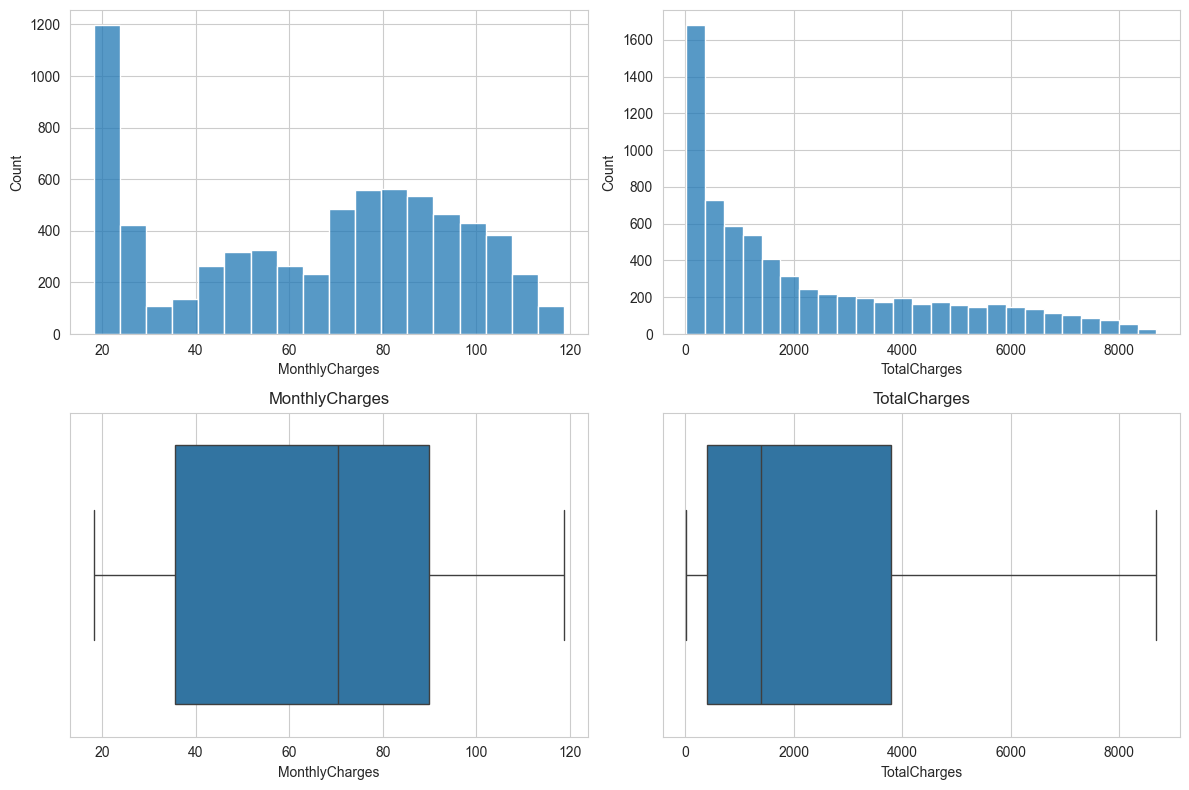

In [12]:
# Visualize Numeric Columns
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Iterate through each binary column and create a bar plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=column, data=data, legend=False)
    plt.subplot(2,2, i+2)
    sns.boxplot(x=column, data=data, legend=False)
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Customers paying less than 25 USD per month
print(len(data[data['MonthlyCharges'] < 25]))
# Customers paying 70-100 USD per month
print(len(data[(data['MonthlyCharges']< 70) & (data['MonthlyCharges'] < 100)]))

# TotalCharges Median, Mean and Max
print(data['TotalCharges'].median())
print(data['TotalCharges'].mean())
print(data['TotalCharges'].max())

1385
3443
1397.475
2283.300440841866
8684.8


The largest share of customers (1385) pay less than 25 USD per month. Almost half of the customers (3443) pay between 70-100 USD per month. 
The TotalCharges are distributed differently. The median is at ca. 1400 USD, but the mean is at 2283, with the maximum reaching up to 8685 USD. 

# Multi-variate Analysis
Examining relationships between variables
- Correlation between binary variables
- Correlation between Internet Services + Churn
- Correlations with numeric variables + Churn
- Counts for Churn among InternetService type, Contract types & PaymentMethods

In [14]:
# Function to Plot Correlation Heatmap
def correlation_heatmap(data):
    # Set the size of the plot
    plt.figure(figsize=(6, 4))

    # Create correlation matrix and heatmap
    correlation_matrix = data.corr()
    sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

/var/folders/pv/ng4pj3dx1lzdf21rlczf5b900000gn/T/ipykernel_77447/3905728771.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace(gender_mapping)


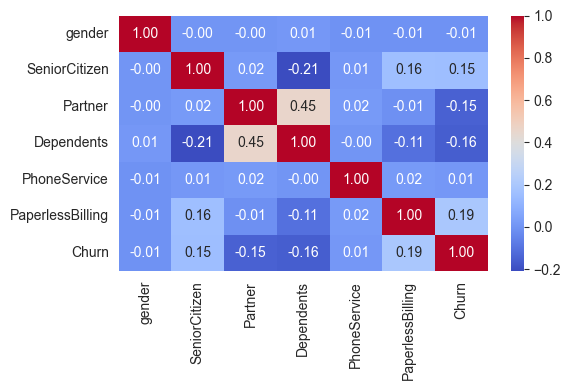

In [15]:
## Correlation Heatmap for Binary Variables
# Map gender column to binary values
gender_mapping = {'Male': 1, 'Female': 0}
data['gender'] = data['gender'].replace(gender_mapping)

# Plot correlation heatmap
correlation_heatmap(data[binary_columns])

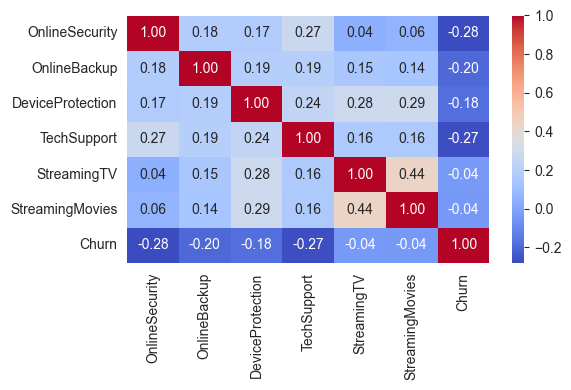

In [16]:
## Correlation Heatmap for Internet Services and Churn
# Map "No internet service" to "No"
internet_services_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data[internet_services_columns] = data[internet_services_columns].map(lambda x: "No" if x == "No internet service" else x)

# Map No to 0 and Yes to 1
data[internet_services_columns] = data[internet_services_columns].map(lambda x: 0 if x == "No" else 1)

# Plot correlation heatmap for customers with internet service
cols = internet_services_columns + ["Churn"]
correlation_heatmap(data[data["InternetService"] != "No"][cols])


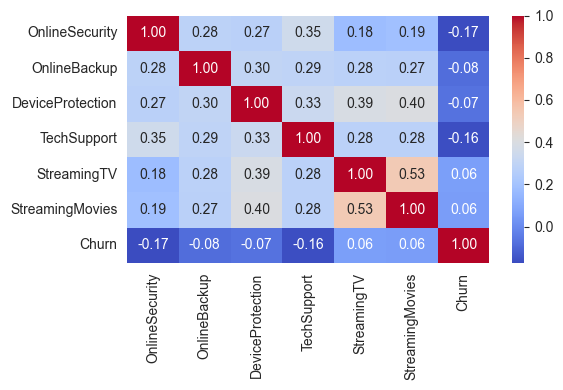

In [17]:
# Check by not subsetting Data to Customers who ordered InternetService
correlation_heatmap(data[cols])

As it should, subsetting to customers who actually have internet service makes a considerable difference

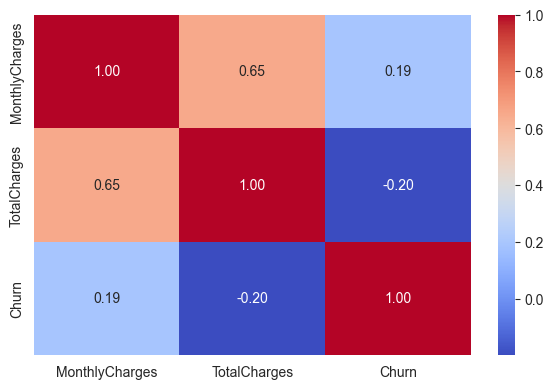

In [18]:
## Correlation between Churn and numeric columns
cols = numerical_columns + ["Churn"]
correlation_heatmap(data[cols])

In [19]:
# Counts for Churn among different InternetService types
print(pd.crosstab(index=data['Churn'], columns=[data['InternetService']], normalize='all', margins=True))

# Counts for Churn among different Contract types
print(pd.crosstab(index=data['Churn'], columns=[data['Contract']], normalize='all', margins=True))

# Counts for Churn among different PaymentMethod types
print(pd.crosstab(index=data['Churn'], columns=[data['PaymentMethod']], normalize='all', margins=True))

InternetService       DSL  Fiber optic        No       All
Churn                                                     
0                0.278299     0.255830  0.200085  0.734215
1                0.065273     0.184443  0.016069  0.265785
All              0.343572     0.440273  0.216155  1.000000
Contract  Month-to-month  One year  Two year       All
Churn                                                 
0               0.315700  0.185722  0.232793  0.734215
1               0.235353  0.023606  0.006826  0.265785
All             0.551052  0.209329  0.239619  1.000000
PaymentMethod  Bank transfer  Credit card  Electronic check  Mailed check  \
Churn                                                                       
0                   0.182594     0.183305          0.184016        0.1843   
1                   0.036689     0.032992          0.152304        0.0438   
All                 0.219283     0.216297          0.336320        0.2281   

PaymentMethod       All  
Churn             


### Observations from Correlation Analysis
- Positive correlation between Dependants & Partner
- Small positive correlations between Churn & SeniorCitizens and Churn & PaperlessBillings
- Small negative correlations between Churn & Dependants and Churn & Partner
- Positive correlations between different online service products
- Small negative correlations between Churn & OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport
- Small positive correlation between Churn & MonthlyCharges (higher prices <-> more churn)
- Small negative correlation between Churn & TotalCharges (more total spend <-> less churn)
- Ca. 40% of Fiber optic customers churn, compared to 19% for DSL and only 7% customers without InternetService
- Ca. 42% of customers with Month-to-Month contracts churn, compared to 11% for 1-year and 2.5% for 2-year
- Electronic check payment has a higher churn rate at 45%, compared to ca. 15-19% for all others